# Settlers of Catan
    Данные из 50 игр с четырьмя игроками, сыгранные на playcatan.com в 2014 году.
    
    1) gameNum - сыгранная игра, имеет 4 соответствующие строки, 1 на игрока.
    2) player - начальная позиция, соответствующая каждой строке
    3) points - сколько очков осталось у игрока (игра выиграна с 10 или более)
    4) me - позиция игрока собравшего данные
    5) 2, 3, ..., 12 - сколько правил каждого значения произошло во время игры (в игру играют 2 кубика)
    6) settlement1, рsettlement2 - каждое начальное поселение регистрируется как 3 пары [число, ресурс]:
    7) L = пиломатериал
    8) C = глина
    9) S = овец
    10) W = пшеница
    11) O = руда
    12) 3G = 3:1 общий порт
    13) 2(X) = 2:1 для ресурса X
    14) D = пустыня
    15) EX: в первой игре, первое поселение игрока было на 6-пиломатериал, 3-глины и 11-глины.
    16) production - общее количество карт, полученных от поселений и городов во время игры
    13) tradeGain - общее количество карт, полученных от торгов со сверстниками и в ходе игры
    14) robberCardsGain - общие карты, полученные от кражи с грабителем, плюс карты развития не-рыцаря. Карта дорожного строительства +4 ресурса.
    15) totalGain - сумма предыдущих 3 столбцов.
    16) tradeLoss - общая сумма карт, потерянных при совершении сделок с равными равными и в течение игры
    17) robberCardsLoss - общие карты, потерянные от грабителей, рыцарей и других монопольных карт игроков
    18) tribute - общее количество потерянных карт, когда игрок должен был бросить 7 бросок (отдельно от предыдущего столбца).
    19) totalLoss - сумма предыдущих 3 столбцов.
    20) totalAvailable - итого totalGain минус totalLoss.

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считаем данные

In [296]:
url = 'https://raw.githubusercontent.com/DavidFalcon/unn_mag/master/my-settlers-of-catan-games/catanstats.txt'
data = pd.read_csv(url, sep = ',', engine = 'python')

In [297]:
type(data)

pandas.core.frame.DataFrame

In [298]:
data

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53
5,2,2,6,NaN,1,6,3,9,10,8,...,W,57,12,1,70,26,6,8,40,30
6,2,3,4,1.0,1,6,3,9,10,8,...,L,44,10,8,62,18,6,8,32,30
7,2,4,9,NaN,1,6,3,9,10,8,...,S,61,16,11,88,25,6,4,35,53
8,3,1,5,NaN,0,3,3,10,10,4,...,S,44,5,5,54,11,1,9,21,33
9,3,2,10,NaN,0,3,3,10,10,4,...,S,41,4,9,54,8,3,0,11,43


Отображение данных стандартными средствами python

In [299]:
print(data)

     gameNum  player  points   me  2  3  4   5   6   7       ...        \
0          1       1       5  NaN  1  3  5   8   7  10       ...         
1          1       2       9  1.0  1  3  5   8   7  10       ...         
2          1       3      10  NaN  1  3  5   8   7  10       ...         
3          1       4       5  NaN  1  3  5   8   7  10       ...         
4          2       1      10  NaN  1  6  3   9  10   8       ...         
5          2       2       6  NaN  1  6  3   9  10   8       ...         
6          2       3       4  1.0  1  6  3   9  10   8       ...         
7          2       4       9  NaN  1  6  3   9  10   8       ...         
8          3       1       5  NaN  0  3  3  10  10   4       ...         
9          3       2      10  NaN  0  3  3  10  10   4       ...         
10         3       3       7  1.0  0  3  3  10  10   4       ...         
11         3       4       7  NaN  0  3  3  10  10   4       ...         
12         4       1       7  NaN  1  

Выведем первые 5 строк таблицы

In [300]:
data.head()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


Выведем последние 5 строк таблицы

In [301]:
data.tail()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
195,49,4,5,NaN,0,5,3,6,13,13,...,S,41,8,11,60,22,4,0,26,34
196,50,1,5,NaN,1,7,4,5,7,17,...,C,41,6,7,54,14,6,4,24,30
197,50,2,10,1.0,1,7,4,5,7,17,...,C,64,5,9,78,15,6,10,31,47
198,50,3,4,NaN,1,7,4,5,7,17,...,S,44,7,4,55,22,1,8,31,24
199,50,4,8,NaN,1,7,4,5,7,17,...,C,57,3,5,65,2,12,8,22,43


Посмотрим на размер данных

In [302]:
print(data.shape)

(200, 36)


В таблице 200 строки и 36 столбцов

Посмотрим на типы данных

In [303]:
type(data)

pandas.core.frame.DataFrame

In [304]:
type(data['points'])

pandas.core.series.Series

Выведем названия столбцов

In [305]:
print(data.columns)

Index(['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'settlement1', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'settlement2',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'production', 'tradeGain', 'robberCardsGain',
       'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss',
       'totalAvailable'],
      dtype='object')


Посмотрим общую информацию по текущему набору данных

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 36 columns):
gameNum            200 non-null int64
player             200 non-null int64
points             200 non-null int64
me                 50 non-null float64
2                  200 non-null int64
3                  200 non-null int64
4                  200 non-null int64
5                  200 non-null int64
6                  200 non-null int64
7                  200 non-null int64
8                  200 non-null int64
9                  200 non-null int64
10                 200 non-null int64
11                 200 non-null int64
12                 200 non-null int64
settlement1        200 non-null int64
Unnamed: 16        200 non-null object
Unnamed: 17        200 non-null int64
Unnamed: 18        200 non-null object
Unnamed: 19        200 non-null int64
Unnamed: 20        200 non-null object
settlement2        200 non-null int64
Unnamed: 22        200 non-null object
Unnamed: 23     

Посмотрим основные статистические характеристики данных

По количественным признакам:

In [307]:
data.describe()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 25,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
count,200.000000,200.00000,200.000000,50.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,2.50000,7.255000,1.0,1.700000,3.960000,4.700000,7.400000,9.160000,10.980000,...,6.660000,51.880000,8.58000,6.480000,66.94000,17.780000,5.310000,5.065000,28.155000,38.785000
std,14.467083,1.12084,2.154806,0.0,1.449311,1.984462,1.925758,2.232694,3.069447,4.830764,...,4.661874,15.439153,4.38861,4.619121,19.83592,9.285077,3.970228,5.352008,12.078927,11.058491
min,1.000000,1.00000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,...,0.000000,19.000000,1.00000,0.000000,23.00000,2.000000,0.000000,0.000000,7.000000,8.000000
25%,13.000000,1.75000,6.000000,1.0,1.000000,3.000000,3.000000,6.000000,7.000000,7.000000,...,2.750000,41.000000,5.00000,3.000000,54.00000,11.000000,2.000000,0.000000,20.000000,31.000000
50%,25.500000,2.50000,7.000000,1.0,1.000000,3.500000,5.000000,7.000000,9.500000,10.000000,...,10.000000,51.000000,8.00000,5.000000,65.00000,16.000000,5.000000,4.000000,25.000000,39.000000
75%,38.000000,3.25000,9.250000,1.0,3.000000,5.000000,6.000000,9.000000,11.000000,14.000000,...,11.000000,61.000000,11.25000,9.000000,80.00000,23.250000,7.250000,8.000000,35.000000,46.250000
max,50.000000,4.00000,12.000000,1.0,6.000000,9.000000,10.000000,13.000000,16.000000,23.000000,...,12.000000,97.000000,21.00000,20.000000,133.00000,47.000000,21.000000,33.000000,72.000000,77.000000


Также можно посмотреть информацию по всем признакам:

In [308]:
data.describe(include = 'all')

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
count,200.000000,200.00000,200.000000,50.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25.500000,2.50000,7.255000,1.0,1.700000,3.960000,4.700000,7.400000,9.160000,10.980000,...,NaN,51.880000,8.58000,6.480000,66.94000,17.780000,5.310000,5.065000,28.155000,38.785000
std,14.467083,1.12084,2.154806,0.0,1.449311,1.984462,1.925758,2.232694,3.069447,4.830764,...,NaN,15.439153,4.38861,4.619121,19.83592,9.285077,3.970228,5.352008,12.078927,11.058491
min,1.000000,1.00000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,...,NaN,19.000000,1.00000,0.000000,23.00000,2.000000,0.000000,0.000000,7.000000,8.000000
25%,13.000000,1.75000,6.000000,1.0,1.000000,3.000000,3.000000,6.000000,7.000000,7.000000,...,NaN,41.000000,5.00000,3.000000,54.00000,11.000000,2.000000,0.000000,20.000000,31.000000
50%,25.500000,2.50000,7.000000,1.0,1.000000,3.500000,5.000000,7.000000,9.500000,10.000000,...,NaN,51.000000,8.00000,5.000000,65.00000,16.000000,5.000000,4.000000,25.000000,39.000000
75%,38.000000,3.25000,9.250000,1.0,3.000000,5.000000,6.000000,9.000000,11.000000,14.000000,...,NaN,61.000000,11.25000,9.000000,80.00000,23.250000,7.250000,8.000000,35.000000,46.250000


Вычислим корелляцию между признаками

In [309]:
data.corr()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 25,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
gameNum,1.000000,0.000000,-0.042314,NaN,0.054164,0.077715,-0.107140,-0.232116,0.007695,0.029768,...,0.013561,-0.040361,-0.132256,0.015040,-0.057174,-0.057349,-0.016010,0.036572,-0.033142,-0.066354
player,0.000000,1.000000,-0.023927,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.044239,0.015681,-0.052101,-0.078619,-0.017630,-0.034766,0.016939,0.063246,0.006867,-0.039123
points,-0.042314,-0.023927,1.000000,NaN,-0.009172,0.038827,0.145681,0.012116,0.147273,0.076284,...,0.160247,0.655416,0.358379,0.373866,0.676489,0.367756,0.296741,0.052151,0.403337,0.772881
me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.054164,0.000000,-0.009172,NaN,1.000000,0.121605,0.133234,-0.080753,-0.084042,0.306333,...,-0.064260,0.094501,-0.004898,0.119200,0.100228,0.013369,0.120168,0.178739,0.128971,0.038910
3,0.077715,0.000000,0.038827,NaN,0.121605,1.000000,0.438660,-0.028127,0.195751,0.224269,...,0.013188,0.168613,-0.010594,0.251539,0.187470,0.095245,0.248413,0.086357,0.193129,0.125319
4,-0.107140,0.000000,0.145681,NaN,0.133234,0.438660,1.000000,-0.186998,0.198590,0.342899,...,0.003135,0.292360,-0.006659,0.248451,0.283939,0.112920,0.244891,0.050658,0.189740,0.302060
5,-0.232116,0.000000,0.012116,NaN,-0.080753,-0.028127,-0.186998,1.000000,0.119668,0.134927,...,-0.062666,0.036532,0.076210,0.068508,0.061249,0.022204,0.093084,0.091592,0.088247,0.013473
6,0.007695,0.000000,0.147273,NaN,-0.084042,0.195751,0.198590,0.119668,1.000000,0.290315,...,0.014005,0.406216,0.237793,0.212883,0.418360,0.335896,0.179407,0.176476,0.395367,0.318573
7,0.029768,0.000000,0.076284,NaN,0.306333,0.224269,0.342899,0.134927,0.290315,1.000000,...,-0.021725,0.358882,0.187093,0.332605,0.398179,0.270349,0.394386,0.319778,0.479138,0.190874


В каждой игре есть 4ре игрока, игрок победил если набрал больше 10 очков, явная корелляция очков с production и действий с картами.

Посмотрим корелляцию отдельно для каждого игрока

In [310]:
data[data["player"] == 1].corr()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 25,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
gameNum,1.000000,NaN,-0.098859,NaN,0.054164,0.077715,-0.107140,-0.232116,0.007695,0.029768,...,-0.133459,-0.158170,-0.096910,0.013056,-0.137835,0.048256,-0.034102,-0.120057,-0.026048,-0.209133
player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,-0.098859,NaN,1.000000,NaN,-0.032063,0.071810,0.126013,-0.148002,0.106983,-0.192600,...,0.065191,0.605416,0.399474,0.402811,0.644090,0.351957,0.305574,-0.054874,0.375625,0.742541
me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.054164,NaN,-0.032063,NaN,1.000000,0.121605,0.133234,-0.080753,-0.084042,0.306333,...,-0.063310,0.039972,-0.105683,0.135409,0.038759,-0.117786,0.331172,0.198667,0.113051,-0.038930
3,0.077715,NaN,0.071810,NaN,0.121605,1.000000,0.438660,-0.028127,0.195751,0.224269,...,0.224692,0.147181,0.047740,0.579154,0.262183,0.184576,0.201919,-0.008893,0.221066,0.239245
4,-0.107140,NaN,0.126013,NaN,0.133234,0.438660,1.000000,-0.186998,0.198590,0.342899,...,0.035481,0.360299,-0.023632,0.367443,0.354571,0.149564,0.283974,-0.108519,0.178670,0.434755
5,-0.232116,NaN,-0.148002,NaN,-0.080753,-0.028127,-0.186998,1.000000,0.119668,0.134927,...,-0.162636,-0.088848,-0.045150,-0.061488,-0.092019,-0.204563,-0.134327,0.357762,-0.058708,-0.101421
6,0.007695,NaN,0.106983,NaN,-0.084042,0.195751,0.198590,0.119668,1.000000,0.290315,...,-0.077340,0.376274,0.125246,0.294289,0.382849,0.190710,0.184303,0.172783,0.299726,0.370692
7,0.029768,NaN,-0.192600,NaN,0.306333,0.224269,0.342899,0.134927,0.290315,1.000000,...,-0.210065,0.180367,-0.049455,0.277739,0.191679,0.031166,0.309196,0.286097,0.265232,0.079123


In [311]:
data[data["player"] == 2].corr()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 25,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
gameNum,1.000000,NaN,0.067940,NaN,0.054164,0.077715,-0.107140,-0.232116,0.007695,0.029768,...,0.065381,0.064093,-0.053012,0.107148,0.066767,0.025323,0.172953,0.050990,0.088554,0.020066
player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,0.067940,NaN,1.000000,NaN,0.065763,-0.074645,-0.032995,-0.025791,0.070125,-0.131452,...,0.115901,0.572248,0.331250,0.135207,0.561560,0.296820,0.196848,-0.029009,0.256074,0.784810
me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.054164,NaN,0.065763,NaN,1.000000,0.121605,0.133234,-0.080753,-0.084042,0.306333,...,-0.147471,0.233014,-0.025260,0.253101,0.244282,-0.048168,0.229151,0.406699,0.207601,0.220127
3,0.077715,NaN,-0.074645,NaN,0.121605,1.000000,0.438660,-0.028127,0.195751,0.224269,...,-0.070121,0.284424,0.070709,-0.028621,0.234643,0.202533,0.419641,0.122527,0.316263,0.064147
4,-0.107140,NaN,-0.032995,NaN,0.133234,0.438660,1.000000,-0.186998,0.198590,0.342899,...,0.106263,0.209827,0.048368,0.159759,0.218043,0.166889,0.178323,0.096133,0.212183,0.162600
5,-0.232116,NaN,-0.025791,NaN,-0.080753,-0.028127,-0.186998,1.000000,0.119668,0.134927,...,-0.101838,0.065842,-0.014114,0.049465,0.061945,-0.035430,0.211486,0.003812,0.034547,0.078630
6,0.007695,NaN,0.070125,NaN,-0.084042,0.195751,0.198590,0.119668,1.000000,0.290315,...,0.141338,0.409970,0.262513,0.089438,0.405860,0.440904,0.265418,0.093313,0.432972,0.254735
7,0.029768,NaN,-0.131452,NaN,0.306333,0.224269,0.342899,0.134927,0.290315,1.000000,...,0.186577,0.315035,0.207339,0.502801,0.422901,0.266198,0.391356,0.483280,0.513261,0.187142


In [312]:
data[data["player"] == 3].corr()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 25,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
gameNum,1.000000,NaN,0.045731,NaN,0.054164,0.077715,-0.107140,-0.232116,0.007695,0.029768,...,0.107218,0.042600,-0.129791,0.127575,0.032520,-0.094056,-0.044978,0.144771,-0.039053,0.097328
player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,0.045731,NaN,1.000000,NaN,-0.013375,-0.055381,0.191252,0.080781,0.214610,0.315748,...,0.229317,0.707655,0.470349,0.489865,0.762120,0.497354,0.338009,0.004874,0.501139,0.793363
me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.054164,NaN,-0.013375,NaN,1.000000,0.121605,0.133234,-0.080753,-0.084042,0.306333,...,-0.108893,-0.005091,-0.020346,-0.031193,-0.015153,0.084491,-0.001586,-0.057932,0.045228,-0.073742
3,0.077715,NaN,-0.055381,NaN,0.121605,1.000000,0.438660,-0.028127,0.195751,0.224269,...,0.014017,-0.021627,-0.152179,0.332561,0.021580,-0.012240,0.054689,0.055885,0.027998,0.007963
4,-0.107140,NaN,0.191252,NaN,0.133234,0.438660,1.000000,-0.186998,0.198590,0.342899,...,0.024002,0.316512,-0.085120,0.391337,0.313516,0.101300,0.390430,0.045036,0.226113,0.305406
5,-0.232116,NaN,0.080781,NaN,-0.080753,-0.028127,-0.186998,1.000000,0.119668,0.134927,...,-0.005222,-0.085167,0.148389,0.069591,-0.019249,0.039214,-0.028835,-0.000826,0.020272,-0.054622
6,0.007695,NaN,0.214610,NaN,-0.084042,0.195751,0.198590,0.119668,1.000000,0.290315,...,0.169958,0.414150,0.228251,0.273922,0.433008,0.314266,0.285555,0.115487,0.379114,0.351628
7,0.029768,NaN,0.315748,NaN,0.306333,0.224269,0.342899,0.134927,0.290315,1.000000,...,-0.047979,0.431251,0.423419,0.234579,0.480510,0.486088,0.454363,0.253565,0.616046,0.185039


In [313]:
data[data["player"] == 4].corr()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 25,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
gameNum,1.000000,NaN,-0.205613,NaN,0.054164,0.077715,-0.107140,-0.232116,0.007695,0.029768,...,0.032577,-0.138869,-0.249010,-0.221504,-0.210386,-0.187068,-0.129786,0.058011,-0.159481,-0.199008
player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,-0.205613,NaN,1.000000,NaN,-0.057863,0.234662,0.304831,0.123729,0.199928,0.267751,...,0.173496,0.711633,0.313599,0.404938,0.707343,0.324847,0.301618,0.207389,0.466478,0.750706
me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.054164,NaN,-0.057863,NaN,1.000000,0.121605,0.133234,-0.080753,-0.084042,0.306333,...,0.074521,0.108781,0.125862,0.113171,0.136491,0.107909,-0.022247,0.138515,0.150158,0.074445
3,0.077715,NaN,0.234662,NaN,0.121605,1.000000,0.438660,-0.028127,0.195751,0.224269,...,-0.163276,0.279801,0.003788,0.181094,0.255806,0.030480,0.350177,0.143867,0.219558,0.211945
4,-0.107140,NaN,0.304831,NaN,0.133234,0.438660,1.000000,-0.186998,0.198590,0.342899,...,-0.173352,0.302627,0.037604,0.092799,0.262488,0.044639,0.123600,0.123228,0.142393,0.314536
5,-0.232116,NaN,0.123729,NaN,-0.080753,-0.028127,-0.186998,1.000000,0.119668,0.134927,...,0.035181,0.252847,0.204458,0.234642,0.291420,0.247716,0.315152,0.059761,0.332535,0.144974
6,0.007695,NaN,0.199928,NaN,-0.084042,0.195751,0.198590,0.119668,1.000000,0.290315,...,-0.191929,0.433937,0.333638,0.228739,0.459568,0.382779,-0.001915,0.302819,0.458842,0.305381
7,0.029768,NaN,0.267751,NaN,0.306333,0.224269,0.342899,0.134927,0.290315,1.000000,...,0.020325,0.497632,0.142618,0.315917,0.484266,0.254751,0.417421,0.267288,0.483045,0.322326


Построим график зависимости очков от производства карт, для каждого игрока

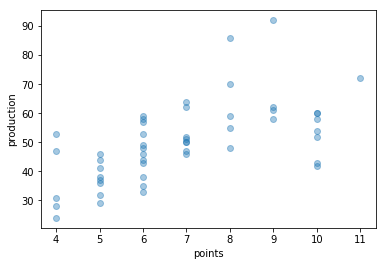

In [314]:
plt.plot(data[data['player']==1]['points'], data[data['player']==1]['production'], 'o', alpha = 0.4)
plt.xlabel('points')
plt.ylabel('production')
pass

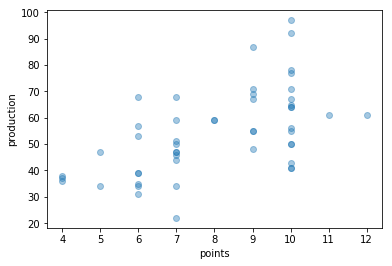

In [315]:
plt.plot(data[data['player']==2]['points'], data[data['player']==2]['production'], 'o', alpha = 0.4)
plt.xlabel('points')
plt.ylabel('production')
pass

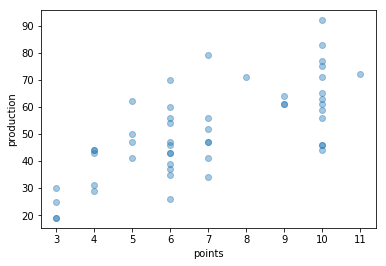

In [316]:
plt.plot(data[data['player']==3]['points'], data[data['player']==3]['production'], 'o', alpha = 0.4)
plt.xlabel('points')
plt.ylabel('production')
pass

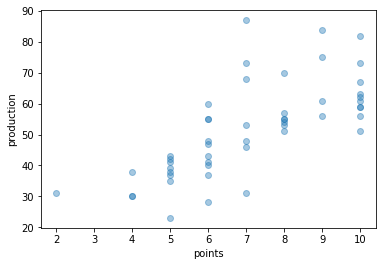

In [317]:
plt.plot(data[data['player']==4]['points'], data[data['player']==4]['production'], 'o', alpha = 0.4)
plt.xlabel('points')
plt.ylabel('production')
pass

Выведем уникальные значения в столбце

In [318]:
data['Unnamed: 22'].unique()

array(['L', 'O', 'W', 'C', 'S'], dtype=object)

Найдем минимальную добычу карт

In [319]:
data['production'].min()

19

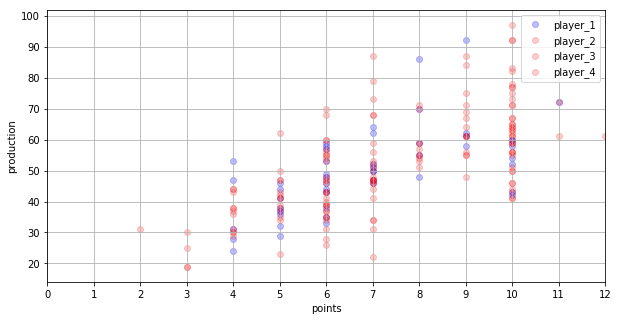

In [320]:
plt.figure(figsize = (10, 5))

plt.scatter(data[data['player'] == 1]['points'],
            data[data['player'] == 1]['production'],
            alpha = 0.25,
            label = 'player_1',
            color = 'b')

plt.scatter(data[data['player'] == 2]['points'],
            data[data['player'] == 2]['production'],
            alpha = 0.2,
            label = 'player_2',
            color = 'r')

plt.scatter(data[data['player'] == 3]['points'],
            data[data['player'] == 3]['production'],
            alpha = 0.2,
            label = 'player_3',
            color = 'r')
plt.scatter(data[data['player'] == 4]['points'],
            data[data['player'] == 4]['production'],
            alpha = 0.2,
            label = 'player_4',
            color = 'r')

plt.xlabel('points')
plt.xticks(range(0, 20))
plt.xlim(0, 12)
plt.ylabel('production')
plt.legend()
plt.grid()

Уберем totalGain и totalLoss т.к. они считаются как сумма предыдущих 3 столбцов и totalAvailable т.к. он равен их разности. Me тоже не вдияет, т.к. для других игроков не известно.

In [321]:
data = data.drop(['totalGain','totalLoss', 'totalAvailable', 'me'], axis = 1)

In [322]:
categorical_columns = [i for i in data.columns if data[i].dtype.name == 'object']
print(categorical_columns)

['Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26']


In [323]:
numerical_columns   = [i for i in data.columns if data[i].dtype.name != 'object']
print(numerical_columns)

['gameNum', 'player', 'points', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'settlement1', 'Unnamed: 17', 'Unnamed: 19', 'settlement2', 'Unnamed: 23', 'Unnamed: 25', 'production', 'tradeGain', 'robberCardsGain', 'tradeLoss', 'robberCardsLoss', 'tribute']


## Обработка пропущенных значений


In [324]:
data[numerical_columns].count(axis = 0)

gameNum            200
player             200
points             200
2                  200
3                  200
4                  200
5                  200
6                  200
7                  200
8                  200
9                  200
10                 200
11                 200
12                 200
settlement1        200
Unnamed: 17        200
Unnamed: 19        200
settlement2        200
Unnamed: 23        200
Unnamed: 25        200
production         200
tradeGain          200
robberCardsGain    200
tradeLoss          200
robberCardsLoss    200
tribute            200
dtype: int64

Посмотрим средние значения по столбцам

In [325]:
data.median(axis = 0)

gameNum            25.5
player              2.5
points              7.0
2                   1.0
3                   3.5
4                   5.0
5                   7.0
6                   9.5
7                  10.0
8                   8.0
9                   8.0
10                  5.0
11                  3.0
12                  1.0
settlement1         5.0
Unnamed: 17         8.0
Unnamed: 19        10.0
settlement2         6.0
Unnamed: 23         8.0
Unnamed: 25        10.0
production         51.0
tradeGain           8.0
robberCardsGain     5.0
tradeLoss          16.0
robberCardsLoss     5.0
tribute             4.0
dtype: float64

## Векторизация

In [326]:
data_describe = data.describe(include = [object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26']


Бинарные признаки отсутсвуют

In [327]:
data['Unnamed: 16'].unique()

array(['L', 'W', 'S', 'O', 'C'], dtype=object)

In [328]:
data['Unnamed: 18'].unique()

array(['C', 'O', 'S', 'L', 'W'], dtype=object)

In [329]:
data['Unnamed: 20'].unique()

array(['C', 'W', 'L', 'O', 'S', '2S', '3G', '2W', '2L', 'D'], dtype=object)

In [330]:
data['Unnamed: 22'].unique()

array(['L', 'O', 'W', 'C', 'S'], dtype=object)

In [331]:
data['Unnamed: 24'].unique()

array(['W', 'S', 'L', 'C', 'O', '2O'], dtype=object)

In [332]:
data['Unnamed: 26'].unique()

array(['O', 'C', 'S', '2L', 'W', 'L', '3G', '2S', 'D', '2O', '2W', 'B',
       '2C'], dtype=object)

Векторизуем категориальные признаки:

In [333]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Unnamed: 16_C', 'Unnamed: 16_L', 'Unnamed: 16_O', 'Unnamed: 16_S',
       'Unnamed: 16_W', 'Unnamed: 18_C', 'Unnamed: 18_L', 'Unnamed: 18_O',
       'Unnamed: 18_S', 'Unnamed: 18_W', 'Unnamed: 20_2L', 'Unnamed: 20_2S',
       'Unnamed: 20_2W', 'Unnamed: 20_3G', 'Unnamed: 20_C', 'Unnamed: 20_D',
       'Unnamed: 20_L', 'Unnamed: 20_O', 'Unnamed: 20_S', 'Unnamed: 20_W',
       'Unnamed: 22_C', 'Unnamed: 22_L', 'Unnamed: 22_O', 'Unnamed: 22_S',
       'Unnamed: 22_W', 'Unnamed: 24_2O', 'Unnamed: 24_C', 'Unnamed: 24_L',
       'Unnamed: 24_O', 'Unnamed: 24_S', 'Unnamed: 24_W', 'Unnamed: 26_2C',
       'Unnamed: 26_2L', 'Unnamed: 26_2O', 'Unnamed: 26_2S', 'Unnamed: 26_2W',
       'Unnamed: 26_3G', 'Unnamed: 26_B', 'Unnamed: 26_C', 'Unnamed: 26_D',
       'Unnamed: 26_L', 'Unnamed: 26_O', 'Unnamed: 26_S', 'Unnamed: 26_W'],
      dtype='object')


## Нормализация количественных признаков

In [334]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,gameNum,player,points,2,3,4,5,6,7,8,...,Unnamed: 19,settlement2,Unnamed: 23,Unnamed: 25,production,tradeGain,robberCardsGain,tradeLoss,robberCardsLoss,tribute
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,2.50000,7.255000,1.700000,3.960000,4.700000,7.400000,9.160000,10.980000,8.820000,...,7.570000,6.045000,6.865000,6.660000,51.880000,8.58000,6.480000,17.780000,5.310000,5.065000
std,14.467083,1.12084,2.154806,1.449311,1.984462,1.925758,2.232694,3.069447,4.830764,3.618434,...,3.732931,1.808127,2.884158,4.661874,15.439153,4.38861,4.619121,9.285077,3.970228,5.352008
min,1.000000,1.00000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,4.000000,...,0.000000,3.000000,0.000000,0.000000,19.000000,1.00000,0.000000,2.000000,0.000000,0.000000
25%,13.000000,1.75000,6.000000,1.000000,3.000000,3.000000,6.000000,7.000000,7.000000,6.000000,...,3.000000,5.000000,4.000000,2.750000,41.000000,5.00000,3.000000,11.000000,2.000000,0.000000
50%,25.500000,2.50000,7.000000,1.000000,3.500000,5.000000,7.000000,9.500000,10.000000,8.000000,...,10.000000,6.000000,8.000000,10.000000,51.000000,8.00000,5.000000,16.000000,5.000000,4.000000
75%,38.000000,3.25000,9.250000,3.000000,5.000000,6.000000,9.000000,11.000000,14.000000,11.000000,...,10.000000,8.000000,9.000000,11.000000,61.000000,11.25000,9.000000,23.250000,7.250000,8.000000
max,50.000000,4.00000,12.000000,6.000000,9.000000,10.000000,13.000000,16.000000,23.000000,18.000000,...,12.000000,9.000000,12.000000,12.000000,97.000000,21.00000,20.000000,47.000000,21.000000,33.000000


In [335]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,gameNum,player,points,2,3,4,5,6,7,8,...,Unnamed: 19,settlement2,Unnamed: 23,Unnamed: 25,production,tradeGain,robberCardsGain,tradeLoss,robberCardsLoss,tribute
count,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,...,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,2.886580e-17,0.000000,3.663736e-17,-2.164935e-17,7.327472e-17,-2.264855e-16,-1.620926e-16,-4.329870e-17,-2.198242e-16,-5.995204e-17,...,9.880985e-17,3.996803e-17,3.330669e-18,-2.692291e-17,-1.801337e-16,3.330669e-18,-7.577272e-17,-1.065814e-16,1.154632e-16,-7.660539e-17
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.693500e+00,-1.338282,-2.438734e+00,-1.172971e+00,-1.995503e+00,-2.440598e+00,-2.866492e+00,-2.006876e+00,-1.858919e+00,-1.332068e+00,...,-2.027897e+00,-1.684064e+00,-2.380244e+00,-1.428610e+00,-2.129651e+00,-1.727198e+00,-1.402864e+00,-1.699501e+00,-1.337455e+00,-9.463737e-01
25%,-8.640305e-01,-0.669141,-5.824189e-01,-4.829881e-01,-4.837583e-01,-8.827694e-01,-6.270450e-01,-7.037097e-01,-8.238862e-01,-7.793426e-01,...,-1.224239e+00,-5.779463e-01,-9.933575e-01,-8.387186e-01,-7.047019e-01,-8.157480e-01,-7.533900e-01,-7.302039e-01,-8.337052e-01,-9.463737e-01
50%,0.000000e+00,0.000000,-1.183401e-01,-4.829881e-01,-2.318008e-01,1.557828e-01,-1.791557e-01,1.107691e-01,-2.028665e-01,-2.266174e-01,...,6.509630e-01,-2.488764e-02,3.935291e-01,7.164501e-01,-5.699795e-02,-1.321603e-01,-3.204073e-01,-1.917055e-01,-7.808115e-02,-1.989907e-01
75%,8.640305e-01,0.669141,9.258372e-01,8.969779e-01,5.240714e-01,6.750590e-01,7.166229e-01,5.994564e-01,6.251599e-01,6.024706e-01,...,6.509630e-01,1.081230e+00,7.402507e-01,9.309562e-01,5.907060e-01,6.083931e-01,5.455583e-01,5.891173e-01,4.886369e-01,5.483923e-01
max,1.693500e+00,1.338282,2.202054e+00,2.966927e+00,2.539731e+00,2.752163e+00,2.508180e+00,2.228414e+00,2.488219e+00,2.537009e+00,...,1.186735e+00,1.634288e+00,1.780416e+00,1.145462e+00,2.922440e+00,2.830053e+00,2.926964e+00,3.146985e+00,3.951914e+00,5.219536e+00


## Объединение данных в одну таблицу

In [336]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(200, 70)


In [337]:
data.describe()

,gameNum,player,points,2,3,4,5,6,7,8,...,Unnamed: 26_2S,Unnamed: 26_2W,Unnamed: 26_3G,Unnamed: 26_B,Unnamed: 26_C,Unnamed: 26_D,Unnamed: 26_L,Unnamed: 26_O,Unnamed: 26_S,Unnamed: 26_W
count,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.886580e-17,0.000000,3.663736e-17,-2.164935e-17,7.327472e-17,-2.264855e-16,-1.620926e-16,-4.329870e-17,-2.198242e-16,-5.995204e-17,...,0.015000,0.015000,0.045000,0.010000,0.195000,0.035000,0.160000,0.130000,0.215000,0.125000
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.121857,0.121857,0.207824,0.099748,0.397195,0.184241,0.367526,0.337147,0.411853,0.331549
min,-1.693500e+00,-1.338282,-2.438734e+00,-1.172971e+00,-1.995503e+00,-2.440598e+00,-2.866492e+00,-2.006876e+00,-1.858919e+00,-1.332068e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.640305e-01,-0.669141,-5.824189e-01,-4.829881e-01,-4.837583e-01,-8.827694e-01,-6.270450e-01,-7.037097e-01,-8.238862e-01,-7.793426e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,-1.183401e-01,-4.829881e-01,-2.318008e-01,1.557828e-01,-1.791557e-01,1.107691e-01,-2.028665e-01,-2.266174e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.640305e-01,0.669141,9.258372e-01,8.969779e-01,5.240714e-01,6.750590e-01,7.166229e-01,5.994564e-01,6.251599e-01,6.024706e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.693500e+00,1.338282,2.202054e+00,2.966927e+00,2.539731e+00,2.752163e+00,2.508180e+00,2.228414e+00,2.488219e+00,2.537009e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [338]:
X = data.drop(('points'), axis = 1) # выбрасываем столбец 'points'
y = data['points']
feature_names = X.columns

In [339]:
type(feature_names)

pandas.core.indexes.base.Index

In [340]:
feature_names

Index(['gameNum', 'player', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', 'settlement1', 'Unnamed: 17', 'Unnamed: 19', 'settlement2',
       'Unnamed: 23', 'Unnamed: 25', 'production', 'tradeGain',
       'robberCardsGain', 'tradeLoss', 'robberCardsLoss', 'tribute',
       'Unnamed: 16_C', 'Unnamed: 16_L', 'Unnamed: 16_O', 'Unnamed: 16_S',
       'Unnamed: 16_W', 'Unnamed: 18_C', 'Unnamed: 18_L', 'Unnamed: 18_O',
       'Unnamed: 18_S', 'Unnamed: 18_W', 'Unnamed: 20_2L', 'Unnamed: 20_2S',
       'Unnamed: 20_2W', 'Unnamed: 20_3G', 'Unnamed: 20_C', 'Unnamed: 20_D',
       'Unnamed: 20_L', 'Unnamed: 20_O', 'Unnamed: 20_S', 'Unnamed: 20_W',
       'Unnamed: 22_C', 'Unnamed: 22_L', 'Unnamed: 22_O', 'Unnamed: 22_S',
       'Unnamed: 22_W', 'Unnamed: 24_2O', 'Unnamed: 24_C', 'Unnamed: 24_L',
       'Unnamed: 24_O', 'Unnamed: 24_S', 'Unnamed: 24_W', 'Unnamed: 26_2C',
       'Unnamed: 26_2L', 'Unnamed: 26_2O', 'Unnamed: 26_2S', 'Unnamed: 26_2W',
       'Unnamed: 26_3G', 'Unn

In [341]:
print(X.shape)
print(y.shape)
N, d = X.shape

(200, 69)
(200,)


In [342]:
type(X)

pandas.core.frame.DataFrame

In [343]:
type(y)

pandas.core.series.Series

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

140 60


## KNN

In [345]:
print(X_train)

      gameNum    player         2         3         4         5         6  \
116  0.311051 -1.338282  0.896978  1.027986  1.194335  0.268734  2.228414   
67  -0.587541  1.338282 -0.482988  0.524071  1.194335  1.612402 -0.377918   
78  -0.380173  0.446094  1.586961 -0.483758  0.675059 -2.866492 -0.377918   
42  -1.002275  0.446094 -0.482988 -0.987673 -0.363493  0.716623  1.576831   
17  -1.417010 -0.446094 -0.482988 -0.483758  1.194335  0.716623  0.925248   
5   -1.624377 -0.446094 -0.482988  1.027986 -0.882769  0.716623  0.273665   
127  0.449296  1.338282  0.206995  1.531901  0.155783 -0.179156 -0.052127   
105  0.103684 -0.446094  0.206995  0.524071  0.675059  0.268734 -1.029501   
48  -0.864030 -1.338282  1.586961 -0.483758  0.675059 -0.179156 -2.006876   
66  -0.587541  0.446094 -0.482988  0.524071  1.194335  1.612402 -0.377918   
54  -0.794908  0.446094  1.586961  0.524071 -0.882769  2.508180  0.925248   
84  -0.241929 -1.338282  0.206995 -0.483758 -0.363493  0.268734 -1.355293   

In [346]:
print(y_train)

116    0.809818
67     1.273896
78    -0.118340
42     1.273896
17     1.273896
5     -0.582419
127   -0.582419
105   -0.118340
48    -0.582419
66    -1.046498
54    -1.046498
84     0.809818
183    0.345739
158   -0.582419
166   -0.582419
113   -1.510576
12    -0.118340
117   -0.118340
93    -0.118340
120    1.273896
154   -1.974655
90     1.273896
81    -0.118340
122   -0.582419
191   -0.118340
13     1.273896
82     1.273896
132   -1.046498
187   -0.582419
45    -0.582419
         ...   
22    -0.582419
61     1.273896
63    -0.118340
7      0.809818
196   -1.046498
141    1.273896
86    -1.510576
96    -0.118340
68    -0.582419
50    -1.974655
142   -0.582419
157   -0.118340
156   -0.582419
139    0.345739
146    1.273896
101   -0.118340
20    -0.582419
178   -0.582419
25    -0.582419
134   -0.118340
71     1.273896
129   -0.582419
144    0.345739
192   -1.510576
79    -0.582419
133   -0.582419
137    1.273896
72     1.273896
140   -1.510576
37     0.809818
Name: points, Length: 14

In [351]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

Не получилось решить эту проблему с входными данными.

In [352]:
knn
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

NotFittedError: Must fit neighbors before querying.